In [1]:
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import xgboost as xgb
import catboost


In [2]:
from sklearn.metrics import classification_report

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import numpy as np

In [4]:
# Get training and testing data
all_train = pd.read_csv("Data/InputData/all_loc_train.csv")
all_test = pd.read_csv("Data/InputData/all_loc_test.csv")

all_train.head()

,#,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,mRNALoc_403#10320|0|training,0,0.003643,0.000792,0.001426,0.002218,0.001584,0.000950,0.000792,0.000950,...,0.000000,0.002693,0.002059,0.001109,0.001109,0.002534,0.001584,0.001901,0.003168,0.003643
1,mRNALoc_4404#20399|0|training,0,0.002914,0.000291,0.000583,0.000291,0.000583,0.000000,0.000000,0.000583,...,0.000583,0.000291,0.000583,0.000291,0.000000,0.001166,0.000291,0.001166,0.000583,0.000291
2,mRNALoc_3392#17196|0|training,0,0.002291,0.001375,0.000458,0.001375,0.000000,0.000917,0.000458,0.001375,...,0.000917,0.001375,0.000917,0.000458,0.000458,0.000917,0.000917,0.002750,0.000458,0.000458
3,mRNALoc_3095#162989|0|training,0,0.000000,0.000990,0.000495,0.000000,0.000990,0.000990,0.000000,0.000495,...,0.000000,0.000495,0.000990,0.000000,0.001484,0.000495,0.000495,0.000000,0.000000,0.000000
4,mRNALoc_1488#117177|0|training,0,0.013061,0.002488,0.004043,0.004354,0.001451,0.001348,0.000415,0.002902,...,0.000311,0.001762,0.001970,0.000933,0.002591,0.001970,0.002695,0.002384,0.002488,0.003732


In [5]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Columns: 1026 entries, # to TTTTT
dtypes: float64(1024), int64(1), object(1)
memory usage: 16.0+ MB


In [6]:
all_test.head()

,#,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,mRNALoc_16986#79230|0|testing,0,0.008836,0.002834,0.002334,0.003168,0.001667,0.003168,0.000000,0.002001,...,0.000834,0.001834,0.001167,0.000500,0.001667,0.001834,0.001667,0.002501,0.002001,0.011504
1,mRNALoc_8139#3082|0|testing,0,0.009503,0.002501,0.003168,0.006002,0.003001,0.000834,0.000167,0.002668,...,0.000167,0.003168,0.001667,0.001334,0.001667,0.003501,0.005835,0.001667,0.003501,0.005669
2,mRNALoc_19034#8816|0|testing,0,0.006005,0.001168,0.002168,0.001168,0.001668,0.001334,0.000167,0.000334,...,0.000167,0.001168,0.000834,0.001501,0.000667,0.001668,0.002502,0.001001,0.001334,0.002002
3,mRNALoc_19863#9737|0|testing,0,0.005673,0.001335,0.002503,0.002837,0.001502,0.001335,0.000167,0.001001,...,0.000000,0.001168,0.002002,0.001001,0.002670,0.001001,0.001168,0.000834,0.001669,0.001502
4,mRNALoc_19031#8816|0|testing,0,0.006008,0.001168,0.002170,0.001168,0.001669,0.001335,0.000167,0.000334,...,0.000167,0.001168,0.000834,0.001502,0.000668,0.001669,0.002503,0.001001,0.001335,0.002003


In [7]:
all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Columns: 1026 entries, # to TTTTT
dtypes: float64(1024), int64(1), object(1)
memory usage: 4.0+ MB


In [8]:
# Remove gene name/symbol column
noname_train = all_train.drop("#", axis="columns")
noname_test = all_test.drop("#", axis="columns")

noname_train.tail()

,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
2035,3,0.004505,0.001855,0.004240,0.004240,0.001855,0.000928,0.000265,0.002385,0.003843,...,0.000265,0.002518,0.002120,0.001723,0.001458,0.002253,0.000928,0.002253,0.002518,0.003710
2036,3,0.003446,0.003048,0.003711,0.002518,0.003711,0.001060,0.001193,0.002253,0.004506,...,0.000265,0.001193,0.000928,0.000398,0.000795,0.000663,0.000398,0.000133,0.000928,0.000398
2037,3,0.001989,0.001061,0.002519,0.002254,0.000663,0.001458,0.000928,0.001193,0.002254,...,0.000133,0.001591,0.001458,0.001193,0.001856,0.000928,0.001458,0.000928,0.001591,0.002386
2038,3,0.003182,0.001193,0.002254,0.000398,0.001326,0.001591,0.000265,0.001326,0.001856,...,0.000265,0.000663,0.001856,0.000928,0.000265,0.000398,0.000530,0.000398,0.000663,0.000398
2039,3,0.010356,0.003054,0.005709,0.004647,0.003850,0.001328,0.000398,0.002390,0.004780,...,0.000266,0.003319,0.001593,0.001593,0.002124,0.003585,0.003850,0.002523,0.001726,0.004780


In [9]:
# Create training and testing input (X) and output (y) data

X_train = noname_train.drop("label", axis="columns")
y_train = noname_train[["label"]]
y_train = y_train.values.ravel() #returns 1D, flattened array

X_test = noname_test.drop("label", axis="columns")
y_test = noname_test[["label"]]
y_test = y_test.values.ravel()

print("Training input data shape:\n", X_train.shape)
print("Training output data shape:\n", y_train.shape, "\n")

print("Testing input data shape:\n", X_test.shape)
print("Testing input data shape:\n", y_test.shape)




Training input data shape:
 (2040, 1024)
Training output data shape:
 (2040,) 

Testing input data shape:
 (510, 1024)
Testing input data shape:
 (510,)


In [10]:
all_train["label"].value_counts()

label
0    824
3    640
1    296
2    280
Name: count, dtype: int64

In [11]:
# Model preparation

models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Linear Discriminant Analysis", LinearDiscriminantAnalysis()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))
# models.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("K Neighbors Classifier", KNeighborsClassifier()))
models.append(("Bernoulli Naive Bayes", BernoulliNB()))
models.append(("Bagging Classifier", BaggingClassifier()))
models.append(("Ada Boost Classifier", AdaBoostClassifier()))
models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("MLP Classifier", MLPClassifier()))
models.append(("SGD Classifier", SGDClassifier()))
models.append(("Support Vector Machine", SVC()))
models.append(("XGBoost", XGBClassifier()))
models.append(("CatBoostClassifier", CatBoostClassifier()))

In [14]:
# Model evaluation

accuracies = []
names = []

for name, model in models:

    model.fit(X_train, y_train)
    mod_acc = model.score(X_test, y_test)
    accuracies.append(mod_acc)
    names.append(name)

    msg = "%s: %f" % (name, mod_acc)
    print(msg)

    if name == "CatBoostClassifier":
        params = model.get_all_params()
        print(f"Parameers for {name}: {params}")

    else:
        params = model.get_params()

Logistic Regression: 0.403922
Linear Discriminant Analysis: 0.545098
Decision Tree Classifier: 0.358824
Random Forest Classifier: 0.556863
K Neighbors Classifier: 0.458824
Bernoulli Naive Bayes: 0.241176
Bagging Classifier: 0.482353
Ada Boost Classifier: 0.482353
Gaussian Naive Bayes: 0.241176


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier: 0.707843
SGD Classifier: 0.403922
Support Vector Machine: 0.613725
XGBoost: 0.535294
Learning rate set to 0.082057
0:	learn: 1.3368905	total: 491ms	remaining: 8m 10s
1:	learn: 1.2932490	total: 818ms	remaining: 6m 48s
2:	learn: 1.2555113	total: 1.12s	remaining: 6m 10s
3:	learn: 1.2178813	total: 1.39s	remaining: 5m 46s
4:	learn: 1.1847470	total: 1.68s	remaining: 5m 34s
5:	learn: 1.1555796	total: 1.98s	remaining: 5m 27s
6:	learn: 1.1250596	total: 2.27s	remaining: 5m 21s
7:	learn: 1.1008409	total: 2.56s	remaining: 5m 17s
8:	learn: 1.0775055	total: 2.85s	remaining: 5m 13s
9:	learn: 1.0566143	total: 3.13s	remaining: 5m 9s
10:	learn: 1.0370284	total: 3.41s	remaining: 5m 6s
11:	learn: 1.0163947	total: 3.73s	remaining: 5m 7s
12:	learn: 0.9988997	total: 4s	remaining: 5m 4s
13:	learn: 0.9839972	total: 4.3s	remaining: 5m 3s
14:	learn: 0.9655918	total: 4.58s	remaining: 5m
15:	learn: 0.9517768	total: 4.89s	remaining: 5m
16:	learn: 0.9399721	total: 5.17s	remaining: 4m 58s
17:	learn: 0

In [18]:
print(accuracies)

[0.403921568627451, 0.5450980392156862, 0.3588235294117647, 0.5568627450980392, 0.4588235294117647, 0.2411764705882353, 0.4823529411764706, 0.4823529411764706, 0.2411764705882353, 0.707843137254902, 0.403921568627451, 0.6137254901960785, 0.5352941176470588, 0.5450980392156862]


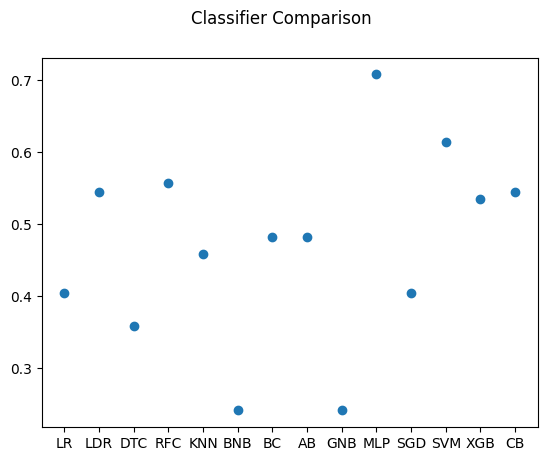

In [42]:
# Boxplot comparison
names=["LR", "LDR", "DTC","RFC","KNN","BNB","BC","AB","GNB","MLP","SGD","SVM","XGB","CB"]
fig = plt.figure()
fig.suptitle("Classifier Comparison")
# ax = fig.add_subplot(111)
plt.scatter(names, accuracies)

# plt.xticks(np.arange(0, 14, step=1))
# plt.xticks(np.arange(14), names)
plt.show()